## Tema 3.3. Desestacionalización (II)

Leer las diapositivas disponibles en el Aula Virtual antes de ejecutar este código. En particular, debéis instalar en vuestro ordenador el programa X-13ARIMA-SEATS

#### DESESTACIONALIZAR LA SERIE DE EMPLEO DE LA EPA

#### 1. Comandos iniciales

In [ ]:
# Importamos librerías relevantes
import os
import pandas as pd
from statsmodels.tsa.x13 import x13_arima_analysis
from statsmodels.tsa.seasonal import seasonal_decompose, STL
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [ ]:
# Leemos los datos y creamos DataFrame
file="https://github.com/otoperalias/Coyuntura/raw/main/clases/datos/ocupados_epa.xlsx"
df = pd.read_excel(file,"ocup",index_col=0, parse_dates=True)

In [ ]:
# Echamos un vistazo a la tabla:
df

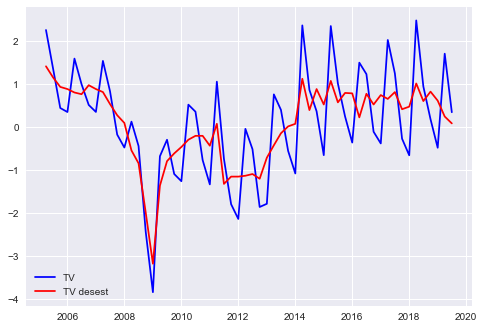

In [4]:
#Calculamos la tasa de variación sin estacionalizar y comparamos
df["tv"]=(df.ocup/df.ocup.shift()-1)*100
# Gráfico
fig,ax=plt.subplots()
ax.plot(df.tv,color="b", label="TV")
ax.plot(df.tv_desest,color="r", label="TV desest")
ax.legend()
plt.show()

#### 2. Ahora vamos a probar diferentes métodos para ver cual de ellos da una serie desestacionalizada más parecida

<AxesSubplot:xlabel='quarter'>

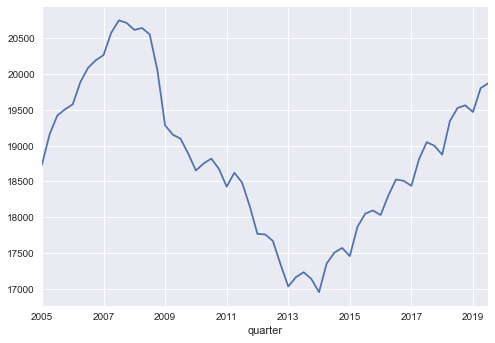

In [5]:
# Primero representamos la serie de ocupados
df.ocup.plot()

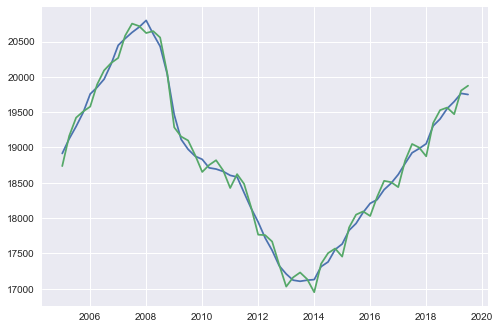

In [7]:
#1 Descomposición clásica
modelo1 = seasonal_decompose(df.ocup, model="additive")
deses1=df.ocup-modelo1.seasonal # ¿Cuál es la diferencia con df.trend???? ==> El resid !
# Gráfico: le echamos un vistazo a la serie desestacionalizada vs la original
fig,ax=plt.subplots()
ax.plot(deses1) 
ax.plot(df.ocup)
plt.show()

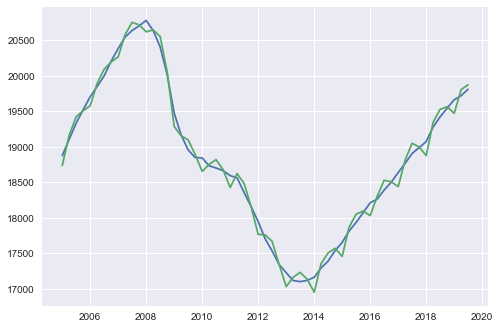

In [8]:
#2 Descomposición STL
modelo2 = STL(df.ocup,seasonal=5).fit()
deses2=df.ocup-modelo2.seasonal
# Gráfico: le echamos un vistazo a la serie desestacionalizada vs la original
fig,ax=plt.subplots()
ax.plot(deses2)
ax.plot(df.ocup)
plt.show()

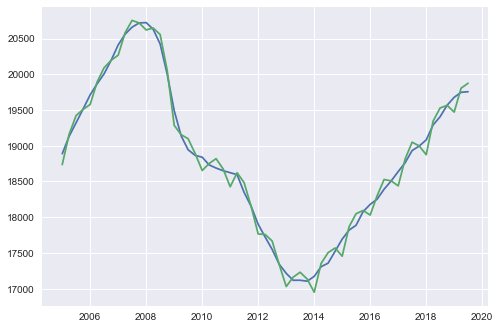

In [9]:
#3 Descomposición X13ARIMA-SEATS
XPATH=os.chdir("C:/WinX13/x13as")
modelo3 = x13_arima_analysis(endog = df.ocup,x12path=XPATH,trading=True)
deses3=modelo3.seasadj
# Leyendo el output. Es muy largo y se debe escribir en un archivo aparte (https://www.pythonforbeginners.com/files/reading-and-writing-files-in-python)
x13output=open("C:/Users/danie/OneDrive - Universidad Pablo de Olavide de Sevilla/ECO/TEACHING/2022-2023/CyP/T3/x13output.txt","w")
x13output.write(modelo3.results)
x13output.close()
# Gráfico: le echamos un vistazo a la serie desestacionalizada vs la original
fig,ax=plt.subplots()
ax.plot(deses3)
ax.plot(df.ocup)
plt.show()

In [10]:
# Calculamos las tasas de variación de las series desestacionalizadas
tv1=(deses1/deses1.shift()-1)*100 # Desc clásica
tv2=(deses2/deses2.shift()-1)*100 # Desc STL
tv3=(deses3/deses3.shift()-1)*100 # Desc x13arima-seats

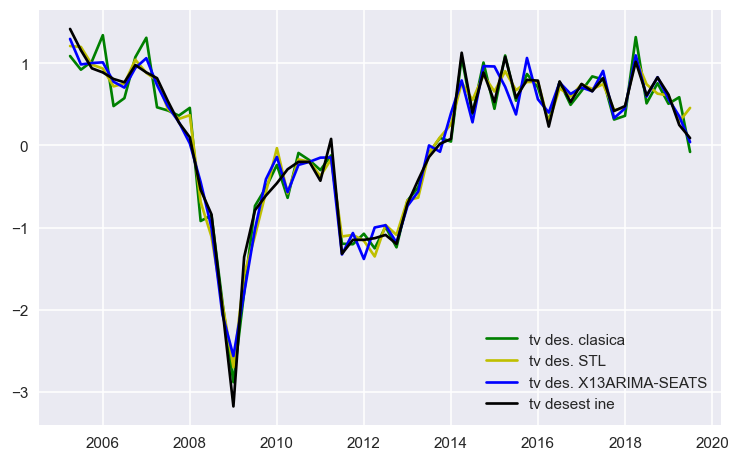

In [11]:
# Dibujamos todas las series en un mismo gráfico para comparar
fig, ax=plt.subplots(figsize=(8,5), dpi=110)
ax.plot(tv1,label="tv des. clasica",c="g")
ax.plot(tv2,label="tv des. STL",c="y")
ax.plot(tv3,label="tv des. X13ARIMA-SEATS",c="b")
ax.plot(df.tv_desest,label="tv desest ine",c="k")
plt.legend()
plt.show()

In [12]:
# Calculamos mape & corr para ver qué método se ajusta más:
import numpy as np
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    corr = np.corrcoef(forecast.dropna(), actual.dropna())[0,1]   # corr
    print({'mape':mape,'corr':corr})
    
print("Desc clásica:")
forecast_accuracy(tv1, df.tv_desest)
print("Desc STL:")
forecast_accuracy(tv2, df.tv_desest)
print("Desc X13-ARIMASEATS:")
forecast_accuracy(tv3, df.tv_desest)

Desc clásica:
{'mape': 0.41778741959751925, 'corr': 0.9777341630138617}
Desc STL:
{'mape': 0.42812018101417454, 'corr': 0.9829586053715879}
Desc X13-ARIMASEATS:
{'mape': 0.4245456098136133, 'corr': 0.9777400818231351}
